# Image Data Augmentation Using Deep Convolutional Generative Adversarial Network (DCGAN)
# Model - Enhanced Generated Images

## Load Libraries

In [1]:
import os
import numpy as np
from skimage.morphology import opening
from skimage import io
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.exposure import adjust_gamma
from skimage.exposure import equalize_adapthist
import matplotlib.pyplot as plt

## Load Mask Data

In [2]:
mask_list = []
# Loop through all the directories
for root, dirs, files in os.walk('.\data\\gan_generated_images_4500_200\\mask'):
    for afile in files:
        file_name = afile.split('.')
        if file_name[len(file_name)-1] == 'png':
            a_mask = img_as_ubyte(io.imread(os.path.join(root, afile), as_gray=True))
            mask_list.append([afile, a_mask])

num_files = len(mask_list)
num_files

100

In [3]:
mask_list[0][1].shape

(128, 128)

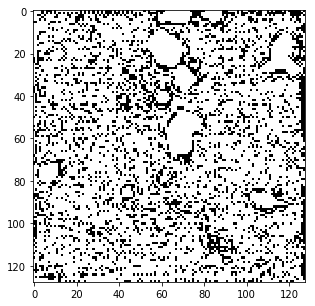

In [4]:
plt.figure(figsize=(5, 5))
plt.imshow(mask_list[0][1], cmap='gray')
plt.show()

## Enhanced the Mask Using Opening Morphological Operation

In [5]:
processed_mask_list = []
# Disk radius
radius = 3.5
selem = disk(radius)
for i in mask_list:
    processed_mask_list.append([i[0], opening(i[1], selem)])

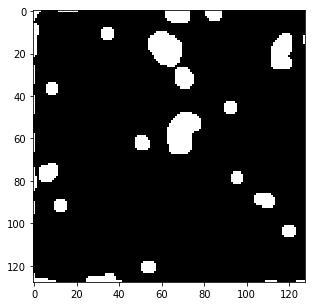

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(processed_mask_list[0][1], cmap='gray')
plt.show()

In [4]:
# Save to file.
for i in processed_mask_list:
    io.imsave('.\data\\gan_generated_images_4500_200\\processed_mask\\' + i[0], i[1])

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_mask\JDEIr21lgshT_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_mask\jzbturAyYD9Q_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_mask\mb5OLgUmvm24_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_mask\mHyiMYGILCkc_mask.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\ve

## Load Image Data

In [7]:
image_list = []
# Loop through all the directories
for root, dirs, files in os.walk('.\data\\gan_generated_images_4500_200\\image'):
    for afile in files:
        file_name = afile.split('.')
        if file_name[len(file_name)-1] == 'png':
            a_image = io.imread(os.path.join(root, afile))
            image_list.append([afile, a_image])

num_files = len(image_list)
num_files

100

In [8]:
image_list[0][1].shape

(128, 128, 4)

In [9]:
type(image_list[0][1])

numpy.ndarray

In [10]:
image_list[0][1].dtype

dtype('uint8')

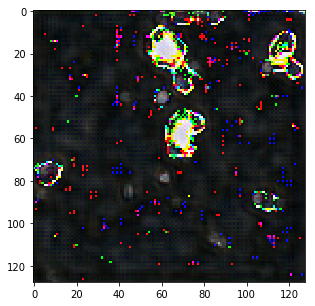

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(image_list[0][1])
plt.show()

## Enhance the Images Using Opening Morphological Operation and Adaptive Equalisation for contrast stretching.

In [12]:
processed_image_list = []
# Disk radius
radius = 3.5
selem = ball(radius)

for i in image_list:
    # Opening morphological operation
    opened = opening(i[1], selem)
    # Adaptive equalization
    equalized = (equalize_adapthist(opened, clip_limit=0.015) * 255.).astype(np.uint)
    # Add back alpha channel to image removed during image enhancement.
    alpha = np.expand_dims(i[1][:, :, 3], axis=2)
    equalized = np.concatenate((equalized, alpha), axis=2)
    processed_image_list.append([i[0], equalized])

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


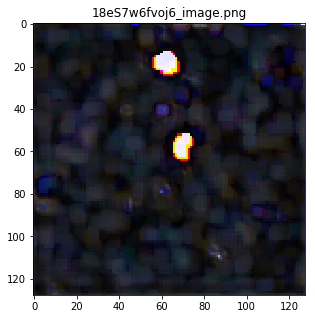

In [13]:
plt.figure(figsize=(5, 5))
plt.imshow(processed_image_list[0][1])
plt.title(processed_image_list[0][0])
plt.show()

In [14]:
processed_image_list[0][1].shape

(128, 128, 4)

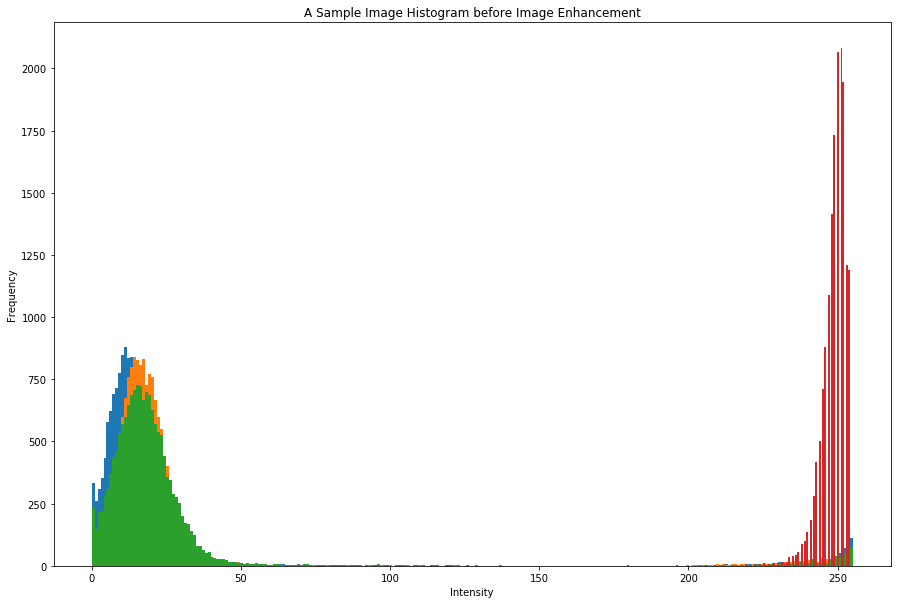

In [20]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.hist(image_list[0][1][:, :, 0].flatten(), 256)
plt.hist(image_list[0][1][:, :, 1].flatten(), 256)
plt.hist(image_list[0][1][:, :, 2].flatten(), 256)
plt.hist(image_list[0][1][:, :, 3].flatten(), 256)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('A Sample Image Histogram before Image Enhancement')
plt.show()

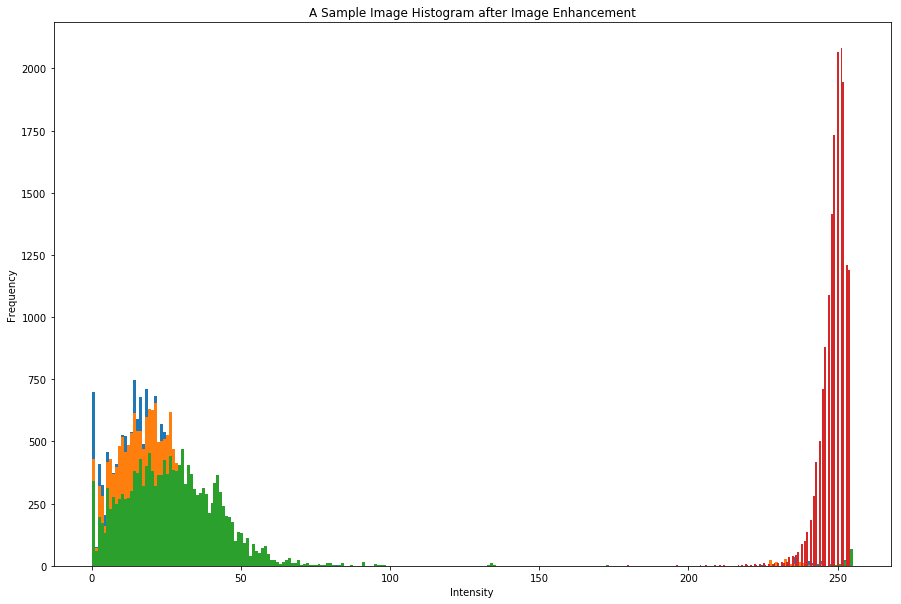

In [21]:
plt.figure(figsize=(15, 10), facecolor='white')
plt.hist(processed_image_list[0][1][:, :, 0].flatten(), 256)
plt.hist(processed_image_list[0][1][:, :, 1].flatten(), 256)
plt.hist(processed_image_list[0][1][:, :, 2].flatten(), 256)
plt.hist(processed_image_list[0][1][:, :, 3].flatten(), 256)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('A Sample Image Histogram after Image Enhancement')
plt.show()

The histogram is stretched for the darker parts of the image.

In [118]:
for i in processed_image_list:
    io.imsave('.\data\\gan_generated_images_4500_200\\processed_image\\' + i[0], i[1])

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\1EgTXWb1jBwe_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\4psoK26nBY61_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\5HLx8oFT4Vli_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\83xRhrfnYuOc_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProject

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\C72X5zdUidfj_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\Chs1tdHxRiLL_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\cUXmW13ZuXQy_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\duibXHO08wHw_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProject

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\Iv6aXRz6cA5o_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\iY0Pe4tBVAsR_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\JDEIr21lgshT_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\JULVGPIgeOtD_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProject

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\q5H1gEWUFyVi_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\q9AVzRkFqGHc_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\QXtF9VzIIHgO_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\RBLyWdsaVjoj_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProject

C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\xcbvhjxXzF25_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\xwTDhIskIXoF_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\y3Bdojg4Jcji_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProjects\gan\venv\lib\site-packages\skimage\io\_io.py:140: UserWarning: .\data\gan_generated_images_4500_200\processed_image\yEsLYFMx6zd0_image.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\e0267338\PycharmProject